# Clasificación de imágenes

Queremos reconocer los dígitos de imágenes que fueron escritas a mano. Los conjuntos de imágenes fueron extraídos de la siguiente página: https://www.python-course.eu/neural_network_mnist.php

Para realizar la clasificación, intentaremos los siguientes 4 métodos:
- Regresión logística.
- Máquina de soporte vectorial.
- Red neuronal.
- Red neuronal convolucional.

## Cargar las imágenes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carga las imágenes. Las imágenes están guardadas en formato .csv, donde
# la primera columna corresponde a la etiqueta y las columnas restantes
# a los pixeles que conforman la imagen.

# Conjunto de entrenamiento. Tomaremos solamente las primeras 2000 imágenes.
train = pd.read_csv('mnist_train.csv').to_numpy()
X_train = train[:2000, 1:]
y_train = train[:2000, 0]

# Conjunto de validación. Tomaremos solamente las primeras 500 imágenes.
test = pd.read_csv('mnist_test.csv').to_numpy()
X_test = test[:500, 1:]
y_test = test[:500, 0]

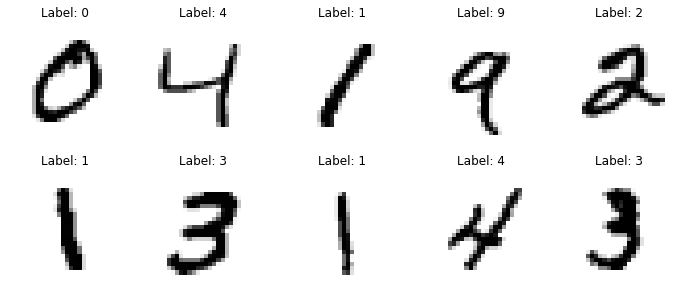

In [3]:
# Muestra las primeras 10 imágenes. Cada imagen es de 28 x 28 pixeles.
plt.figure(figsize = (12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    plt.imshow(X_train[i].reshape(28, 28), cmap = 'gray_r')
plt.show()

## Regresión logística

Sean $Y_1, Y_2, \ldots, Y_n$ variables aleatorias con distribución Bernoulli
$$P(Y_i = y_i) = \begin{cases}
\pi_i, & y_i = 1,\\
1 - \pi_i, & y_i = 0.
\end{cases}$$

En **regresión logística**, las probabilidades son modeladas a través de la función *logit* y una combinación lineal de *variables explicativas*
$$\log\left(\frac{\pi_i}{1 - \pi_i}\right) = \beta_0 + \beta_1 x_{i1} + \ldots + \beta_p x_{ip}$$
de donde
$$\pi_i = \frac{\exp\left(x_i^T \beta\right)}{1 + \exp\left(x_i^T \beta\right)}.$$

Lo anterior puede ser generalizado a variables aleatorias con distribución multinomial
\begin{align}
P(Y_i = 0) &= 1 - \sum_{k = 1}^{K - 1}P(Y_i = k) \\
P(Y_i = 1) &= \frac{\exp\left(x_i^T \beta_1\right)}{1 + \sum_{k = 1}^{K - 1}\exp\left(x_i^T \beta_k\right)} \\
P(Y_i = 2) &= \frac{\exp\left(x_i^T \beta_2\right)}{1 + \sum_{k = 1}^{K - 1}\exp\left(x_i^T \beta_k\right)} \\
&\vdots \\
P(Y_i = K - 1) &= \frac{\exp\left(x_i^T \beta_{K - 1}\right)}{1 + \sum_{k = 1}^{K - 1}\exp\left(x_i^T \beta_k\right)}
\end{align}

In [4]:
from sklearn.preprocessing import normalize
import sklearn.linear_model as lm
import sklearn.metrics as metrics

In [5]:
# Ajusta el modelo al conjunto de entrenamiento.
# Normaliza los datos dividiendo entre la norma antes de ajustar el modelo.
model = lm.LogisticRegression().fit(normalize(X_train), y_train)

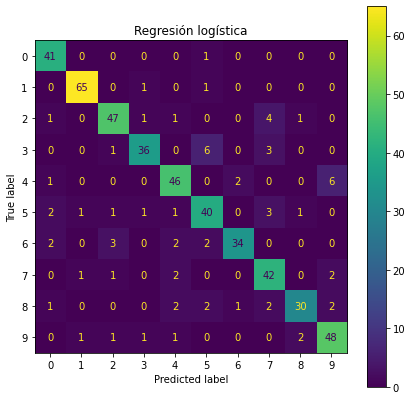

In [6]:
# Intenta predecir las etiquetas para el conjunto de validación.
# Cuenta las predicciones que resultaron correctas e incorrectas.
plt.figure(figsize = (7, 7))
plt.title('Regresión logística')
metrics.plot_confusion_matrix(model, normalize(X_test), y_test, ax = plt.gca())
plt.show()

### Métricas para evaluar el desempeño del clasificador

Sean 
- $T_p$ el número de muestras "positivas" que fueron predecidas como positivas (verdaderos positivos),
- $T_n$ el número de muestras "negativas" que fueron predecidas como negativas (verdaderos negativos),
- $F_p$ el número de muestras "negativas" que fueron predecidas como positivas (falsos positivos),
- $F_n$ el número de muestras "positivas" que fueron predecidas como negativas (falsos negativos).

Definamos las siguientes métricas:
- **Precision**:  La proporción de verdaderos positivos entre el número de muestras predecidas como positivas.
$$P = \frac{T_p}{T_p + F_p}$$
- **Recall**: La proporción de verdaderos positivos entre el número de muestras positivas.
$$R = \frac{T_p}{T_p + F_n}$$
- **F1-Score**: La media armónica de precission y recall.
$$F_1 = \frac{2PR}{P + R}$$

In [7]:
# Evalúa el desempeño del modelo.
y_pred = model.predict(normalize(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        42
           1       0.96      0.97      0.96        67
           2       0.87      0.85      0.86        55
           3       0.90      0.78      0.84        46
           4       0.84      0.84      0.84        55
           5       0.77      0.80      0.78        50
           6       0.92      0.79      0.85        43
           7       0.78      0.88      0.82        48
           8       0.88      0.75      0.81        40
           9       0.83      0.89      0.86        54

    accuracy                           0.86       500
   macro avg       0.86      0.85      0.85       500
weighted avg       0.86      0.86      0.86       500



## Máquinas de soporte vectorial

Supongamos que tenemos un conjunto de datos en donde cada dato pertenece a alguna de dos categorías. Los datos pueden ser vistos como puntos en un espacio de dimensión $K$, y queremos saber si podemos separar los puntos mediante un hiperplano de dimensión $K - 1$. Una **máquina de soporte vectorial** lo que hace es escoger el hiperplano que maximice la distancia entre el hiperplano y el punto más cercano en cada lado.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg/1024px-Svm_separating_hyperplanes_%28SVG%29.svg.png" height="auto" width="300">

Un *kernel* es una función alternativa al producto punto que mapea los puntos a un nuevo espacio en donde se ajusta el hiperplano, permitiendo así separar los puntos en el espacio original mediante una hiper-superficie no lineal.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/1920px-Kernel_Machine.svg.png" height="auto" width="400">

Algunos ejemplos de kernel son:
- Lineal: $\langle x, x'\rangle$
- Polinomial: $\left(\gamma \langle x, x'\rangle + r\right)^d$
- Función de base radial Gaussiana: $\exp\left(-\gamma \|x - x'\|^2\right)$
- Sigmoide: $\tanh\left(\gamma \langle x, x'\rangle + r\right)$

In [8]:
import sklearn.svm as svm

In [9]:
# Ajusta el modelo al conjunto de entrenamiento. Utiliza un kernel Gaussiano.
model = svm.SVC(kernel = 'rbf').fit(X_train, y_train)

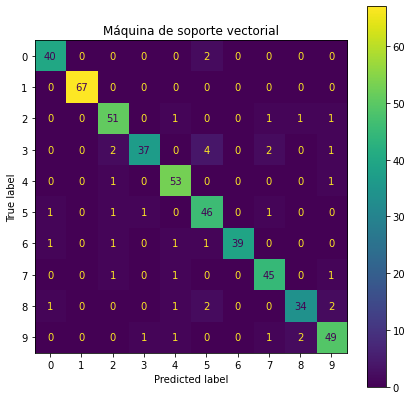

In [10]:
# Intenta predecir las etiquetas para el conjunto de validación.
# Cuenta las predicciones que resultaron correctas e incorrectas.
plt.figure(figsize = (7, 7))
plt.title('Máquina de soporte vectorial')
metrics.plot_confusion_matrix(model, X_test, y_test, ax = plt.gca())
plt.show()

In [11]:
# Evalúa el desempeño del modelo.
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       1.00      1.00      1.00        67
           2       0.89      0.93      0.91        55
           3       0.95      0.80      0.87        46
           4       0.91      0.96      0.94        55
           5       0.84      0.92      0.88        50
           6       1.00      0.91      0.95        43
           7       0.90      0.94      0.92        48
           8       0.92      0.85      0.88        40
           9       0.89      0.91      0.90        54

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



## Redes neuronales

Definimos una *transformación afín* como una transformación del estilo 
$$y = Ax + b$$
para alguna matriz $A$ y algún vector $b$.

Definimos la función de activación *ReLU (Rectified Linear Unit)* como
$$ReLU(x) = \max(0, x).$$

**Diseño de la red neuronal**

Entrada: Un vector de dimensión $784$ ($28 \times 28$) representando la imagen.

Salida: Un vector de dimensión $10$.

1. Transformamos la imagen de entrada mediante una transformación afín para obtener un vector de dimensión $480$.
2. Aplicamos la función de activación ReLU al vector obtenido en el paso 1 para eliminar las entradas negativas del vector.
3. Transformamos el vector obtenido en el paso 2 mediante una transformación afín para obtener un vector de dimensión $120$.
4. Aplicamos la función de activación ReLU al vector obtenido en el paso 3 para eliminar las entradas negativas del vector.
5. Transformamos el vector obtenido en el paso 4 mediante una transformación afín para obtener un vector de dimensión $84$.
6. Aplicamos la función de activación ReLU al vector obtenido en el paso 5 para eliminar las entradas negativas del vector.
7. Transformamos el vector obtenido en el paso 6 mediante una transformación afín para obtener un vector de dimensión $10$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/444px-Colored_neural_network.svg.png" height="auto" width="300">

**Predicción**

Entrada: Un vector de dimensión $784$ representando la imagen.

Salida: Una etiqueta $\{0, 1, 2, \ldots, 9\}$ representando la predicción de la red neuronal.

1. Generar la salida correspondiente a la imagen de entrada.
2. Devolver el índice de la entrada con mayor valor en el vector obtenido en el paso 1.

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [13]:
class NN(nn.Module):
    # Inicializa las transformaciones afines que conformarán la red neuronal.
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features = 784, out_features = 480)
        self.fc2 = nn.Linear(in_features = 480, out_features = 120)
        self.fc3 = nn.Linear(in_features = 120, out_features = 84)
        self.fc4 = nn.Linear(in_features = 84, out_features = 10)
        
    # Genera la salida correspondiente como se describió anteriormente.
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
    # Predice la etiqueta correspondiente como se describió anteriormente.
    def predict(self, x):
        with torch.no_grad():
            y = self(x)
            return torch.argmax(y, dim = 1)

In [14]:
# Utiliza la GPU siempre que esté disponible (¡es más rápido!).
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

# Inicializa la red neuronal.
model = NN().to(device)

Device: cuda:0


### Entrena la red neuronal

Definimos la función de pérdida por entropía cruzada (*Cross entropy loss*) como
$$loss(x, i) = -\log\left(\frac{\exp(x_i)}{\sum_{j} \exp(x_j)}\right).$$
La pérdida será mínima cuando $\exp(x_i) \approx \sum_{j} \exp(x_j)$, de donde $\exp(x_j) \approx 0$ para $j \neq i$. Intuitivamente, la pérdida será mínima cuando $x$ pertenece a la clase $i$.

Para entrenar la red neuronal, debemos minimizar entonces la entropía cruzada para cada vector en el conjunto de entrenamiento:
$$loss(y, i)$$
donde $y = (y_0, y_1, \ldots, y_9)$ es la salida generada por la red neuronal e $i$ es la clase verdadera a la que pertenece.

Para minimizar la función anterior, utilizamos el algoritmo de *descenso de gradiente estocástico (SGD)*, el cual es similar al algoritmo de descenso de gradiente, excepto que el cálculo del gradiente se realiza utilizando solamente un subconjunto (batch) en lugar de todo el conjunto de entrenamiento.

In [15]:
import torch.optim as optim

In [16]:
# Datos del optimizador.
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)

# Reordena el conjunto de entrenamiento en batches de tamaño 10.
train_X = torch.from_numpy(X_train).float().view(-1, 10, 784)
train_y = torch.from_numpy(y_train).long().view(-1, 10)

# Conjunto de validación.
test_X = torch.from_numpy(X_test).float()
test_y = torch.from_numpy(y_test).long()

In [17]:
# Entrena el modelo. Itera 50 veces y en cada iteración ajusta los parámetros
# según la dirección del gradiente.
for epoch in range(50):
    total_loss = 0.0
    
    for x_in, y_true in zip(train_X, train_y):
        x_in = x_in.to(device)
        y_true = y_true.to(device)
        
        optimizer.zero_grad()
        y_out = model(x_in)
        loss = criterion(y_out, y_true)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        
    print(f'Epoch: {epoch}\tTotal loss: {total_loss}')

Epoch: 0	Total loss: 201.88203458231874
Epoch: 1	Total loss: 74.22573827952147
Epoch: 2	Total loss: 52.157860855804756
Epoch: 3	Total loss: 44.9569448690163
Epoch: 4	Total loss: 32.4605804826424
Epoch: 5	Total loss: 20.06857229169691
Epoch: 6	Total loss: 12.602145918917813
Epoch: 7	Total loss: 7.6982189044069855
Epoch: 8	Total loss: 6.782746277802062
Epoch: 9	Total loss: 22.66777562612924
Epoch: 10	Total loss: 9.965730489429916
Epoch: 11	Total loss: 2.4099378209948554
Epoch: 12	Total loss: 1.007904471350571
Epoch: 13	Total loss: 0.20593926830053988
Epoch: 14	Total loss: 0.09559416748089689
Epoch: 15	Total loss: 0.07009043954906247
Epoch: 16	Total loss: 0.05757767975094907
Epoch: 17	Total loss: 0.04913285182132654
Epoch: 18	Total loss: 0.04295053587904363
Epoch: 19	Total loss: 0.03816542091928454
Epoch: 20	Total loss: 0.03438813730247148
Epoch: 21	Total loss: 0.031309782522257024
Epoch: 22	Total loss: 0.028749296354646958
Epoch: 23	Total loss: 0.026582469331245306
Epoch: 24	Total loss: 

### Evalúa el desempeño

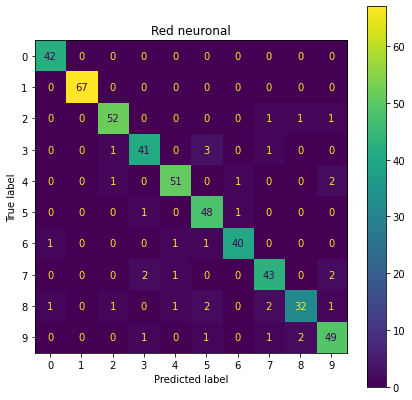

In [18]:
# Intenta predecir las etiquetas para el conjunto de validación.
# Cuenta las predicciones que resultaron correctas e incorrectas.
plt.figure(figsize = (7, 7))
plt.title('Red neuronal')
model = model.to('cpu')
confusion_matrix = metrics.confusion_matrix(test_y, model.predict(test_X))
confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix)
confusion_matrix.plot(ax = plt.gca())
plt.show()

In [19]:
# Evalúa el desempeño del modelo.
print(metrics.classification_report(test_y, model.predict(test_X)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      1.00      1.00        67
           2       0.95      0.95      0.95        55
           3       0.91      0.89      0.90        46
           4       0.94      0.93      0.94        55
           5       0.87      0.96      0.91        50
           6       0.95      0.93      0.94        43
           7       0.90      0.90      0.90        48
           8       0.91      0.80      0.85        40
           9       0.89      0.91      0.90        54

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



## Redes neuronales convolucionales

Definimos una **convolución** sobre una imagen $A$ como una nueva imagen $B$ en donde cada pixel de $B$ corresponde a una suma ponderada de los pixeles vecinos del pixel de la imagen $A$
$$B(i,j) = bias + \sum_{k = -a}^{a} \sum_{l = -b}^{b} w(k, l) A(i + k, j + l)$$
Aquí, a la matriz de pesos $w$ se le conoce como *kernel*. Este procedimiento puede repetirse varias veces para obtener distintos *canales* o capas a partir de una misma imagen.

<img src="https://upload.wikimedia.org/wikipedia/commons/6/68/Conv_layer.png" height="auto" width="320">

Notemos que no es posible realizar una suma ponderada sobre los pixeles que están en los bordes de la imagen, pues se requeriría sumar pixeles fuera de los bordes. Como resultado, la imagen de salida será más pequeña. Así, si la imagen de entrada es de tamaño $m \times n$ y aplicamos un kernel de tamaño $(2a + 1) \times (2b + 1)$, entonces la imagen de salida será de tamaño $(m - 2a) \times (n - 2b)$. Lo anterior puede solucionarse extendiendo los bordes de la imagen, agregando un relleno o *padding* alrededor de la imagen. De esta manera, si la imagen de entrada es de tamaño $m \times n$ y aplicamos un kernel de tamaño $(2a + 1) \times (2b + 1)$ con un relleno de tamaño $p \times q$ en los bordes, entonces la imagen de salida será de tamaño $(m + 2p - 2a) \times (n + 2q - 2b)$.

**Diseño de la red neuronal**

Entrada: Un tensor de dimensión $1 \times 28 \times 28$ representando la imagen ($1$ canal, $28$ pixeles de altura y $28$ pixeles de ancho).

Salida: Un vector de dimensión $10$.

1. Aplicamos una convolución a la imagen de entrada con $6$ canales de salida y un kernel de tamaño $5 \times 5$ sin relleno. La imagen resultante será de tamaño $6 \times 24 \times 24$.
2. Aplicamos la función de activación ReLU a cada entrada de la imagen obtenida en el paso 1.
3. Aplicamos una convolución a la imagen obtenida en el paso 2 con $16$ canales de salida y un kernel de tamaño $5 \times 5$ sin relleno. La imagen resultante será de tamaño $16 \times 20 \times 20$.
4. Aplicamos la función de activación ReLU a cada entrada de la imagen obtenida en el paso 3.
5. Reacomodamos las entradas de la imagen obtenida en el paso 4 para obtener un vector de dimensión $16 \cdot 20 \cdot 20 = 6400$.
6. Aplicamos la función de activación ReLU a cada entrada del vector obtenido en el paso 5.
7. Transformamos el vector obtenido en el paso 6 mediante una transformación afín para obtener un vector de dimensión $120$.
8. Aplicamos la función de activación ReLU a cada entrada del vector obtenido en el paso 7.
9. Transformamos el vector obtenido en el paso 8 mediante una transformación afín para obtener un vector de dimensión $84$.
10. Aplicamos la función de activación ReLU a cada entrada del vector obtenido en el paso 9.
11. Transformamos el vector obtenido en el paso 10 mediante una transformación afín para obtener un vector de dimensión $10$.

**Predicción**

Entrada: Un tensor de dimensión $1 \times 28 \times 28$ representando la imagen.

Salida: Una etiqueta $\{0, 1, 2, \ldots, 9\}$ representando la predicción de la red neuronal.

1. Generar la salida correspondiente a la imagen de entrada.
2. Devolver el índice de la entrada con mayor valor en el vector obtenido en el paso 1.

In [20]:
class CNN(nn.Module):
    # Inicializa las convoluciones y transformaciones afines que conformarán 
    # la red neuronal.
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, 
                               kernel_size = 5, padding = 0)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, 
                               kernel_size = 5, padding = 0)
        self.fc1 = nn.Linear(in_features = 16*20*20, out_features = 120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 84)
        self.fc3 = nn.Linear(in_features = 84, out_features = 10)
        
    # Genera la salida correspondiente como se describió anteriormente.
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = torch.flatten(x, start_dim = 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    # Predice la etiqueta correspondiente como se describió anteriormente.
    def predict(self, x):
        with torch.no_grad():
            y = self(x)
            return torch.argmax(y, dim = 1)

In [21]:
# Utiliza la GPU siempre que esté disponible (¡es más rápido!).
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

# Inicializa la red neuronal.
model = CNN().to(device)

Device: cuda:0


### Entrena la red neuronal

In [22]:
# Datos del optimizador.
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)

# Reordena el conjunto de entrenamiento en batches de tamaño 10.
train_X = torch.from_numpy(X_train).float().view(-1, 10, 1, 28, 28)
train_y = torch.from_numpy(y_train).long().view(-1, 10)

# Conjunto de validación.
test_X = torch.from_numpy(X_test).float().view(-1, 1, 28, 28)
test_y = torch.from_numpy(y_test).long()

In [23]:
# Entrena el modelo. Itera 50 veces y en cada iteración ajusta los parámetros
# según la dirección del gradiente.
for epoch in range(50):
    total_loss = 0.0
    
    for x_in, y_true in zip(train_X, train_y):
        x_in = x_in.to(device)
        y_true = y_true.to(device)
        
        optimizer.zero_grad()
        y_out = model(x_in)
        loss = criterion(y_out, y_true)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        
    print(f'Epoch: {epoch}\tTotal loss: {total_loss}')

Epoch: 0	Total loss: 153.77849010843784
Epoch: 1	Total loss: 42.728334047918906
Epoch: 2	Total loss: 22.20567855661102
Epoch: 3	Total loss: 10.290100427669586
Epoch: 4	Total loss: 18.299419649424635
Epoch: 5	Total loss: 5.102366482863772
Epoch: 6	Total loss: 3.20744197698059
Epoch: 7	Total loss: 1.31211834630626
Epoch: 8	Total loss: 0.1994802640410871
Epoch: 9	Total loss: 0.022444806020605057
Epoch: 10	Total loss: 0.016863417340584164
Epoch: 11	Total loss: 0.013691137032306955
Epoch: 12	Total loss: 0.011580831134800462
Epoch: 13	Total loss: 0.010056079904689597
Epoch: 14	Total loss: 0.00889845127491995
Epoch: 15	Total loss: 0.007984511370803915
Epoch: 16	Total loss: 0.0072424059490643344
Epoch: 17	Total loss: 0.006621419218072688
Epoch: 18	Total loss: 0.0060996397154244875
Epoch: 19	Total loss: 0.005654046084238473
Epoch: 20	Total loss: 0.00527044092323159
Epoch: 21	Total loss: 0.004935165145516507
Epoch: 22	Total loss: 0.004640117212112216
Epoch: 23	Total loss: 0.004376346089461691
Ep

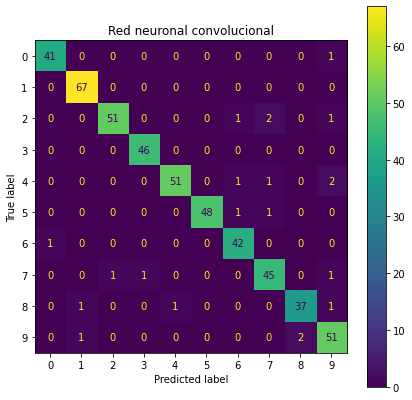

In [24]:
# Intenta predecir las etiquetas para el conjunto de validación.
# Cuenta las predicciones que resultaron correctas e incorrectas.
plt.figure(figsize = (7, 7))
plt.title('Red neuronal convolucional')
model = model.to('cpu')
confusion_matrix = metrics.confusion_matrix(test_y, model.predict(test_X))
confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix)
confusion_matrix.plot(ax = plt.gca())
plt.show()

In [25]:
# Evalúa el desempeño del modelo.
print(metrics.classification_report(test_y, model.predict(test_X)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.97      1.00      0.99        67
           2       0.98      0.93      0.95        55
           3       0.98      1.00      0.99        46
           4       0.98      0.93      0.95        55
           5       1.00      0.96      0.98        50
           6       0.93      0.98      0.95        43
           7       0.92      0.94      0.93        48
           8       0.95      0.93      0.94        40
           9       0.89      0.94      0.92        54

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500

